<a href="https://colab.research.google.com/github/shruti-singh/AdvMachineLearning/blob/main/assignment1/Q1_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.3.0


In [8]:
# DL and ML libs
import tensorflow_datasets as tfds
from sklearn.model_selection import KFold

In [9]:
# Data preprocessing
import glob
import pathlib
import pandas as pd
import numpy as np

# IMage dispay and plotting
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Generic
from collections import defaultdict, Counter
import time


**CD to appropriate directory**

In [10]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cd /content/drive/My Drive/Coursework/Sem3/AdvanceML/HW1/

/content/drive/My Drive/Coursework/Sem3/AdvanceML/HW1


In [12]:
# pwd

'/content/drive/My Drive/Coursework/Sem3/AdvanceML/HW1'

***Load the tensorboard plugins***

In [11]:
# !mkdir ./q1_tf_logs/
# !ls ./q1_tf_logs/

## !rm -r ./q1_tf_logs/

In [12]:
from tensorboard.plugins.hparams import api as hp

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear logs from previous runs 
# !rm -rf ./q1_tf_logs/

**Download the Dataset**

---



In [ ]:
# !mkdir datasets

In [ ]:
# !wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz -P ./datasets/

--2020-10-06 14:46:56--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.27.176, 2404:6800:4009:80e::2010, 2404:6800:4009:801::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.27.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘./datasets/flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  4.59MB/s    in 53s     

2020-10-06 14:47:54 (4.08 MB/s) - ‘./datasets/flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
# !mkdir ./datasets/flowers

In [ ]:
# !tar -C ./datasets/flowers/ -xf ./datasets/flower_photos.tgz

In [13]:
!ls datasets/flowers/flower_photos/

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [13]:
flower_categories = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

In [14]:
flower_files = defaultdict(list)

for cat in flower_categories:
    flower_files[cat] = glob.glob("./datasets/flowers/flower_photos/{}/*".format(cat))

In [15]:
data_stats_df = pd.DataFrame(columns=["ImageCategory", "#Instances"])
for locid, cat in enumerate(flower_categories):
    data_stats_df.loc[locid] = [cat, len(flower_files[cat])]

print("Composition of the flowers dataset: \n")
from IPython.display import display, HTML
display(HTML(data_stats_df.to_html()))

Composition of the flowers dataset: 



,ImageCategory,#Instances
0,daisy,633
1,dandelion,898
2,roses,641
3,sunflowers,699
4,tulips,799


**Display sample images**

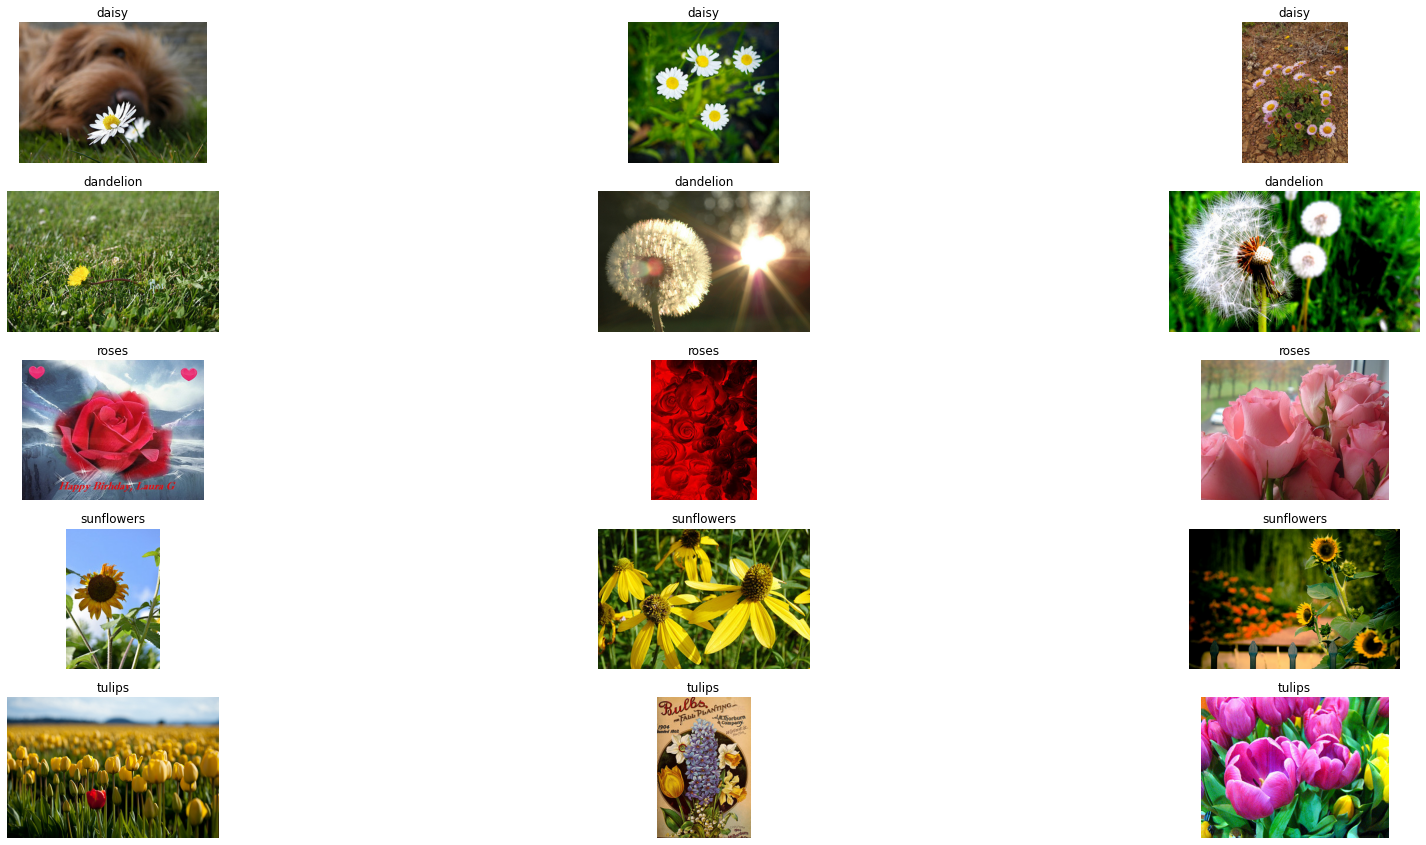

In [ ]:
plt.figure(figsize=(30, 15))
for idx, cat in enumerate(flower_files):
    for i in range(3):
        axs = plt.subplot(5, 3, idx*3 + i+1)
        img = mpimg.imread(flower_files[cat][i])
        plt.imshow(img)
        plt.title(cat)
        plt.axis("off")

We can observe that all the images are of different sizes. Also, it is not possible to classify an image just on the basis of the color that is present in abundance.

**Dataset Preprocessing and Preparation for Training**

In [ ]:
# # Create a test set and train+val set
# !mkdir ./datasets/flowers/train_val_set
# !mkdir ./datasets/flowers/test_set

# for i in flower_categories:
#     train_dir = "./datasets/flowers/train_val_set/"+i
#     test_dir = "./datasets/flowers/test_set/"+i
#     !mkdir $train_dir
#     !mkdir $test_dir

## !rm -r ./datasets/flowers/train_val_set
## !rm -r  ./datasets/flowers/test_set

In [ ]:
# print("Individual class composition: ")
# for cat in flower_files:
#     count_files = len(flower_files[cat])
#     random_indices_for_test_set = np.random.randint(0, count_files, int(0.1*count_files))
#     for idx, name in enumerate(flower_files[cat]):
#         img_fname = flower_files[cat][idx]
#         if idx in random_indices_for_test_set:
#             test_dir = "./datasets/flowers/test_set/" + cat + "/"
#             !cp $img_fname $test_dir
#         else:
#             train_dir = "./datasets/flowers/train_val_set/" + cat + "/"
#             !cp $img_fname $train_dir
#     print("{}: train+val={} test={}".format(cat, count_files-len(random_indices_for_test_set), len(random_indices_for_test_set)))

Individual class composition: 
daisy: train+val=570 test=63
dandelion: train+val=809 test=89
roses: train+val=577 test=64
sunflowers: train+val=630 test=69
tulips: train+val=720 test=79


In [17]:
tf.keras.preprocessing.image_dataset_from_directory??

In [20]:
tf.keras.utils.get_file??

In [16]:
# Read the flowers training and validation sets using keras preprocessor

batch_size = 32
img_height = 180
img_width = 180

# We don't need the origin url as we have manually downloaded and constructed the train+val and test split of the data, but it is a mandatory argument so ..
data_dir = tf.keras.utils.get_file('/content/drive/My Drive/Coursework/Sem3/AdvanceML/HW1/datasets/flowers/train_val_set/', origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz')
data_dir = pathlib.Path(data_dir)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

# Should be 3321  files for train and val combined.

Found 3321 files belonging to 5 classes.
Using 2657 files for training.
Found 3321 files belonging to 5 classes.
Using 664 files for validation.


In [17]:
# Prefetching: This fastens up the overall pipeline. While the model is training on step s, it is preprocessing the input data for next step s+1
# .cache: Keeps the data in memory even after first epoch is finished executing
AUTOTUNE = tf.data.experimental.AUTOTUNE # Initially is -1

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Part A: Simple Feed Forward Neural Network**

---



In [60]:
class FeedForwardModel:
    
    def __init__(self):

        self.learning_rate = 0.1
        self.optimizer = 'adam'
        self.num_units_l1 = hp.HParam('num_units_l1', hp.Discrete([180, 250, 500]))
        self.num_units_l2 = hp.HParam('num_units_l2', hp.Discrete([50, 80, 150]))

        self.hparams = {self.num_units_l1: self.num_units_l1, self.num_units_l2: self.num_units_l2}
        self.epochs = 10

        self.log_dir = './q1_tf_logs/hparam_tuning/'

        METRIC_ACCURACY = 'accuracy'
        
        # To store event details
        with tf.summary.create_file_writer(self.log_dir).as_default():
            hp.hparams_config(
                hparams=[self.num_units_l1, self.num_units_l2],
                metrics=[hp.Metric(METRIC_ACCURACY, display_name='ValAccuracy')],
            )
        
        self.model = None
        return
    
    def train_model(self, hparams, train_data, cross_validation_data):
        num_classes = 5
        
        # self.model = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        #                                          tf.keras.layers.Flatten(),
        #                                          tf.keras.layers.Dense(hparams[self.num_units_l1], activation=tf.nn.relu),
        #                                          tf.keras.layers.Dense(hparams[self.num_units_l2], activation=tf.nn.relu),
        #                                          tf.keras.layers.Dense(num_classes)])
        self.model = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                                                 tf.keras.layers.Flatten(),
                                                 tf.keras.layers.Dense(hparams["num_units_l1"], activation=tf.nn.relu),
                                                 tf.keras.layers.Dense(hparams["num_units_l2"], activation=tf.nn.relu),
                                                 tf.keras.layers.Dense(num_classes)])
                      
        # Model compilation
        self.model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

        # Model training
        history = self.model.fit(train_data, validation_data=cross_validation_data, epochs=self.epochs)
        return history
    
    def get_model_summary(self):
        print("Model Summary: ")
        print(self.model.summary())
        return
    
    def run_model(self, train_set, val_set, hparams=None):
        if not hparams:
            hparams = {'num_units_l1': 180, 'num_units_l2': 50}
        history = self.train_model(hparams, train_set, val_set)
        self.plot_los_acc_for_hparams(history, hparams)

        return history.history['accuracy'], history.history['val_accuracy']
    
    def plot_los_acc_for_hparams(self, history, hparams):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss=history.history['loss']
        val_loss=history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.suptitle("For hparams: L1={} and L2={}".format(hparams["num_units_l1"], hparams["num_units_l2"]))
        plt.show()
        plt.savefig("./q1_tf_logs/fnn_config_{}_{}".format(hparams["num_units_l1"], hparams["num_units_l2"]))
        return

    def run(self, run_dir, hparams, train_set, val_set):
        
        with tf.summary.create_file_writer(run_dir).as_default():
            # record the values used in this trial
            hp.hparams(hparams)  
            accuracy = []
            
            history = self.train_model(hparams, train_set, val_set)
            train_acc = history.history['accuracy']
            val_acc = history.history['val_accuracy']
            
            accuracy.append(val_acc)
            tf.summary.scalar('accuracy', np.mean(accuracy), step=1)

            self.plot_los_acc_for_hparams(history)
        return
    
    # Grid search for best parameters using cross validation. Parameters in this model is the number of units in layer1 and layer2.
    def grid_search(self, train_set, val_set):
        session_index = 0

        for units_l1 in self.num_units_l1.domain.values:
            for units_l2 in self.num_units_l2.domain.values:
                hparams = {self.num_units_l1: units_l1, self.num_units_l2: units_l2}
                run_name = "run-%d" % session_index
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                self.run(self.log_dir + "grid/" + run_name, hparams, train_set, val_set)
                session_index += 1
        
        total_points_explored =  len(self.num_units_l1.domain.values) * len(self.num_units_l2.domain.values)
        return total_points_explored

Epoch 1/10
84/84 [==============================] - 9s 112ms/step - loss: 7.5852 - accuracy: 0.3256 - val_loss: 3.4529 - val_accuracy: 0.3057
Epoch 2/10
84/84 [==============================] - 9s 112ms/step - loss: 2.5217 - accuracy: 0.3982 - val_loss: 2.5688 - val_accuracy: 0.3238
Epoch 3/10
84/84 [==============================] - 9s 111ms/step - loss: 1.8001 - accuracy: 0.4381 - val_loss: 2.1038 - val_accuracy: 0.3539
Epoch 4/10
84/84 [==============================] - 9s 111ms/step - loss: 1.6985 - accuracy: 0.4723 - val_loss: 1.7414 - val_accuracy: 0.4127
Epoch 5/10
84/84 [==============================] - 9s 110ms/step - loss: 1.5765 - accuracy: 0.4983 - val_loss: 2.5487 - val_accuracy: 0.3840
Epoch 6/10
84/84 [==============================] - 9s 110ms/step - loss: 1.6269 - accuracy: 0.5006 - val_loss: 2.1618 - val_accuracy: 0.3720
Epoch 7/10
84/84 [==============================] - 9s 110ms/step - loss: 1.4359 - accuracy: 0.5326 - val_loss: 1.9507 - val_accuracy: 0.4383
Epoch 

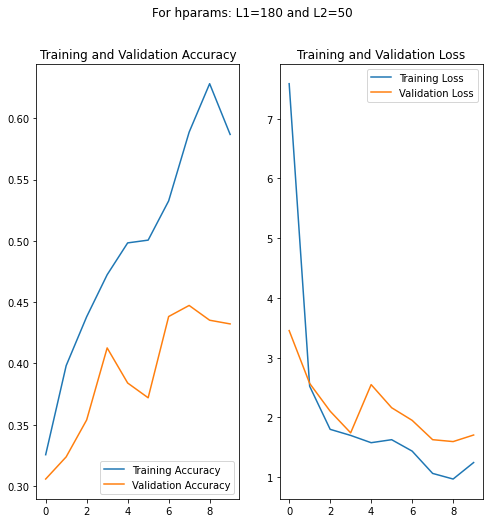

Epoch 1/10
84/84 [==============================] - 9s 110ms/step - loss: 7.9142 - accuracy: 0.3071 - val_loss: 4.5921 - val_accuracy: 0.3027
Epoch 2/10
84/84 [==============================] - 9s 113ms/step - loss: 2.6949 - accuracy: 0.4140 - val_loss: 2.7557 - val_accuracy: 0.3554
Epoch 3/10
84/84 [==============================] - 9s 109ms/step - loss: 2.4011 - accuracy: 0.4283 - val_loss: 2.2944 - val_accuracy: 0.3720
Epoch 4/10
84/84 [==============================] - 10s 113ms/step - loss: 2.3134 - accuracy: 0.4366 - val_loss: 2.5068 - val_accuracy: 0.3614
Epoch 5/10
84/84 [==============================] - 9s 109ms/step - loss: 1.2687 - accuracy: 0.5284 - val_loss: 2.0609 - val_accuracy: 0.3343
Epoch 6/10
84/84 [==============================] - 9s 111ms/step - loss: 1.2078 - accuracy: 0.5371 - val_loss: 1.7188 - val_accuracy: 0.3946
Epoch 7/10
84/84 [==============================] - 9s 109ms/step - loss: 1.1396 - accuracy: 0.5649 - val_loss: 1.4855 - val_accuracy: 0.4277
Epoch

<Figure size 432x288 with 0 Axes>

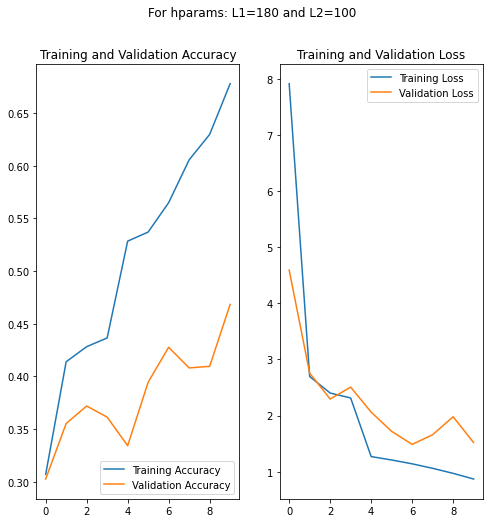

Epoch 1/10
84/84 [==============================] - 12s 147ms/step - loss: 7.9323 - accuracy: 0.2879 - val_loss: 2.2239 - val_accuracy: 0.3298
Epoch 2/10
84/84 [==============================] - 12s 146ms/step - loss: 2.7338 - accuracy: 0.3583 - val_loss: 1.8667 - val_accuracy: 0.3810
Epoch 3/10
84/84 [==============================] - 13s 151ms/step - loss: 2.2451 - accuracy: 0.4144 - val_loss: 1.7610 - val_accuracy: 0.4383
Epoch 4/10
84/84 [==============================] - 13s 150ms/step - loss: 2.1691 - accuracy: 0.4370 - val_loss: 2.2123 - val_accuracy: 0.3584
Epoch 5/10
84/84 [==============================] - 13s 149ms/step - loss: 1.6376 - accuracy: 0.4513 - val_loss: 1.7117 - val_accuracy: 0.4277
Epoch 6/10
84/84 [==============================] - 13s 149ms/step - loss: 1.5599 - accuracy: 0.4772 - val_loss: 1.8918 - val_accuracy: 0.3630
Epoch 7/10
84/84 [==============================] - 13s 149ms/step - loss: 1.4144 - accuracy: 0.5344 - val_loss: 1.9638 - val_accuracy: 0.4036

<Figure size 432x288 with 0 Axes>

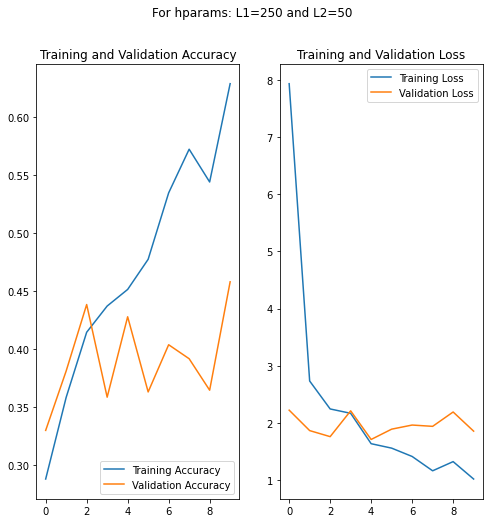

Epoch 1/10
84/84 [==============================] - 13s 151ms/step - loss: 11.6698 - accuracy: 0.3128 - val_loss: 8.0327 - val_accuracy: 0.2907
Epoch 2/10
84/84 [==============================] - 13s 152ms/step - loss: 4.3640 - accuracy: 0.3914 - val_loss: 5.2933 - val_accuracy: 0.3358
Epoch 3/10
84/84 [==============================] - 13s 150ms/step - loss: 2.3160 - accuracy: 0.4268 - val_loss: 2.3376 - val_accuracy: 0.4157
Epoch 4/10
84/84 [==============================] - 12s 148ms/step - loss: 1.5460 - accuracy: 0.4930 - val_loss: 1.5570 - val_accuracy: 0.4458
Epoch 5/10
84/84 [==============================] - 12s 148ms/step - loss: 1.4823 - accuracy: 0.5137 - val_loss: 1.7991 - val_accuracy: 0.4217
Epoch 6/10
84/84 [==============================] - 13s 151ms/step - loss: 1.1764 - accuracy: 0.5676 - val_loss: 2.1369 - val_accuracy: 0.3569
Epoch 7/10
84/84 [==============================] - 13s 149ms/step - loss: 1.0994 - accuracy: 0.5980 - val_loss: 2.1991 - val_accuracy: 0.430

<Figure size 432x288 with 0 Axes>

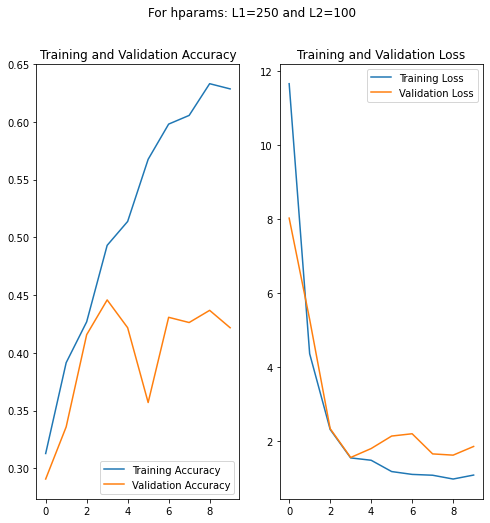

<Figure size 432x288 with 0 Axes>

In [61]:
m = FeedForwardModel()

hparam_configs = {"config1": {'num_units_l1': 180, 'num_units_l2': 50}, 
                  "config2": {'num_units_l1': 180, 'num_units_l2': 100},
                  "config3": {'num_units_l1': 250, 'num_units_l2': 50},
                  "config4": {'num_units_l1': 250, 'num_units_l2': 100}}

results = defaultdict(list)

for pconfig in hparam_configs:
    start_time = time.time()
    tacc, vacc = m.run_model(train_ds, val_ds, hparams=hparam_configs[pconfig])
    comp_time = time.time() - start_time
    results[pconfig] = (tacc, vacc, comp_time)

In [62]:
results["config1"]

([0.32555514574050903,
  0.39819344878196716,
  0.438088059425354,
  0.4723372161388397,
  0.49830636382102966,
  0.5005645751953125,
  0.5325555205345154,
  0.5886337757110596,
  0.628152072429657,
  0.5867519974708557],
 [0.3057228922843933,
  0.3237951695919037,
  0.35391566157341003,
  0.41265061497688293,
  0.3840361535549164,
  0.3719879388809204,
  0.4382530152797699,
  0.4472891688346863,
  0.4352409541606903,
  0.4322289228439331],
 95.01614022254944)

In [65]:
# Results: Training Time
res_df = pd.DataFrame(columns=["Config", "Train_Time", "Macro_Train_Acc", "Macro_Val_Acc"])

for idx, cfg_id in enumerate(results):
    res_df.loc[idx] = [str(hparam_configs[cfg_id]), results[cfg_id][2], np.mean(results[cfg_id][0]), np.mean(results[cfg_id][1])]
display(HTML(res_df.to_html()))

,Config,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,"{'num_units_l1': 180, 'num_units_l2': 50}",95.016140,0.496914,0.390512
1,"{'num_units_l1': 180, 'num_units_l2': 100}",94.264609,0.512947,0.383434
2,"{'num_units_l1': 250, 'num_units_l2': 50}",127.291623,0.470493,0.391566
3,"{'num_units_l1': 250, 'num_units_l2': 100}",127.895812,0.517049,0.398193


------------
**Part B: Basic Convolution Neural Network**

In [91]:
class CNNModel:
    
    def __init__(self):

        self.log_dir = './q1_tf_logs/CNN/'
        METRIC_ACCURACY = 'accuracy'
        self.model = None
        self.epochs = 10
        return
    
    def train_basic_cnn_model(self, hparams, train_data, cross_validation_data):
        num_classes = 5
        self.model = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                                                 tf.keras.layers.Conv2D(hparams["num_units_l1"], 3, strides=hparams["strides"],padding='same', activation='relu'),
                                                 tf.keras.layers.MaxPooling2D(),
                                                 tf.keras.layers.Flatten(),
                                                 tf.keras.layers.Dense(num_classes)])
        
        # Model compilation
        self.model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

        # Model training
        history = self.model.fit(train_data, validation_data=cross_validation_data, epochs=self.epochs, verbose=1)
        return history
    
    def get_model_summary(self):
        print("Model Summary: ")
        print(self.model.summary())
        return
    
    def run_model(self, train_set, val_set, hparams=None):
        if not hparams:
            hparams = {'num_units_l1': 32, "stride": (1,1)}
        history = self.train_basic_cnn_model(hparams, train_set, val_set)
        self.plot_los_acc_for_hparams(history, hparams)

        return history.history['accuracy'], history.history['val_accuracy']

    
    def plot_los_acc_for_hparams(self, history, hparams):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss=history.history['loss']
        val_loss=history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.suptitle("For hparams: L1={} stride={}".format(hparams["num_units_l1"], hparams["strides"][0]))
        plt.savefig("./q1_tf_logs/cnn_config_{}_{}".format(hparams["num_units_l1"], hparams["strides"][0]))
        plt.show()
        return

    def train_lenet_similar_model(self, train_data, cross_validation_data):
        num_classes = 5
        self.model = tf.keras.models.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                                                 tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
                                                 tf.keras.layers.AveragePooling2D(),
                                                 tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
                                                 tf.keras.layers.AveragePooling2D(),
                                                 tf.keras.layers.Flatten(),
                                                 tf.keras.layers.Dense(units=120, activation='relu'),
                                                 tf.keras.layers.Dense(units=84, activation='relu'),
                                                 tf.keras.layers.Dense(units=5, activation='relu'),])
        
        # Model compilation
        self.model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

        # Model training
        history = self.model.fit(train_data, validation_data=cross_validation_data, epochs=self.epochs, verbose=1)
        return history
    
    def run_lenet_model(self, train_set, val_set):
        
        history = self.train_lenet_similar_model(train_set, val_set)

        print("LeNet Summary:")
        self.get_model_summary()

        # Plot for lenet
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss=history.history['loss']
        val_loss=history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.suptitle("LeNet")
        plt.savefig("./q1_tf_logs/LeNet_cnn_var")
        plt.show()

        return history.history['accuracy'], history.history['val_accuracy']


Epoch 1/10
84/84 [==============================] - 29s 340ms/step - loss: 1.5436 - accuracy: 0.4464 - val_loss: 1.1517 - val_accuracy: 0.5301
Epoch 2/10
84/84 [==============================] - 28s 338ms/step - loss: 0.8445 - accuracy: 0.6936 - val_loss: 1.2849 - val_accuracy: 0.4729
Epoch 3/10
84/84 [==============================] - 29s 341ms/step - loss: 0.4889 - accuracy: 0.8464 - val_loss: 1.1667 - val_accuracy: 0.5738
Epoch 4/10
84/84 [==============================] - 28s 338ms/step - loss: 0.2766 - accuracy: 0.9277 - val_loss: 1.2872 - val_accuracy: 0.5437
Epoch 5/10
84/84 [==============================] - 29s 340ms/step - loss: 0.1467 - accuracy: 0.9710 - val_loss: 1.3034 - val_accuracy: 0.5587
Epoch 6/10
84/84 [==============================] - 29s 348ms/step - loss: 0.0857 - accuracy: 0.9868 - val_loss: 1.4107 - val_accuracy: 0.5482
Epoch 7/10
84/84 [==============================] - 29s 351ms/step - loss: 0.0531 - accuracy: 0.9940 - val_loss: 1.6044 - val_accuracy: 0.5166

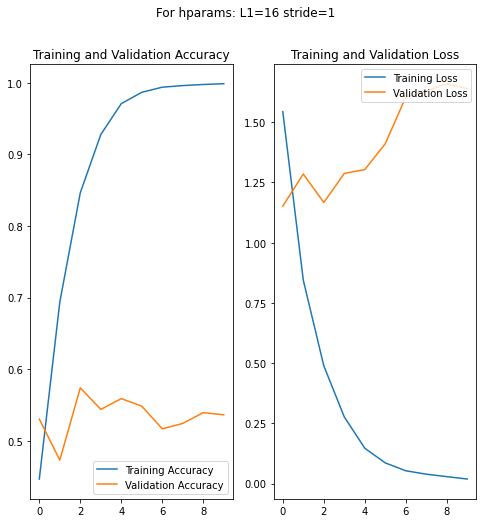

Epoch 1/10
84/84 [==============================] - 5s 60ms/step - loss: 1.2682 - accuracy: 0.4780 - val_loss: 1.1018 - val_accuracy: 0.5527
Epoch 2/10
84/84 [==============================] - 5s 61ms/step - loss: 1.0094 - accuracy: 0.6116 - val_loss: 1.0729 - val_accuracy: 0.5572
Epoch 3/10
84/84 [==============================] - 5s 60ms/step - loss: 0.8422 - accuracy: 0.6978 - val_loss: 1.0155 - val_accuracy: 0.6024
Epoch 4/10
84/84 [==============================] - 5s 61ms/step - loss: 0.7167 - accuracy: 0.7493 - val_loss: 1.0427 - val_accuracy: 0.5964
Epoch 5/10
84/84 [==============================] - 5s 61ms/step - loss: 0.5741 - accuracy: 0.8209 - val_loss: 1.0201 - val_accuracy: 0.6160
Epoch 6/10
84/84 [==============================] - 5s 61ms/step - loss: 0.4920 - accuracy: 0.8495 - val_loss: 1.0343 - val_accuracy: 0.6054
Epoch 7/10
84/84 [==============================] - 5s 61ms/step - loss: 0.3837 - accuracy: 0.9037 - val_loss: 1.0305 - val_accuracy: 0.6220
Epoch 8/10
84

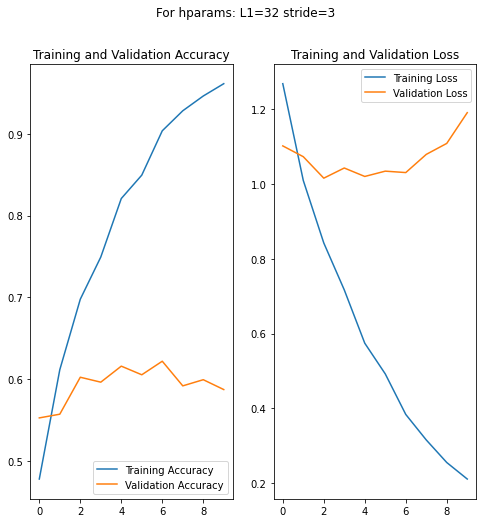

Epoch 1/10
84/84 [==============================] - 29s 339ms/step - loss: 2.1917 - accuracy: 0.4185 - val_loss: 1.1951 - val_accuracy: 0.5166
Epoch 2/10
84/84 [==============================] - 28s 337ms/step - loss: 0.9800 - accuracy: 0.6304 - val_loss: 1.1547 - val_accuracy: 0.5301
Epoch 3/10
84/84 [==============================] - 29s 340ms/step - loss: 0.6417 - accuracy: 0.7862 - val_loss: 1.1381 - val_accuracy: 0.5542
Epoch 4/10
84/84 [==============================] - 28s 339ms/step - loss: 0.3788 - accuracy: 0.8931 - val_loss: 1.2981 - val_accuracy: 0.5346
Epoch 5/10
84/84 [==============================] - 29s 342ms/step - loss: 0.2144 - accuracy: 0.9541 - val_loss: 1.3240 - val_accuracy: 0.5346
Epoch 6/10
84/84 [==============================] - 29s 342ms/step - loss: 0.1385 - accuracy: 0.9774 - val_loss: 1.3411 - val_accuracy: 0.5542
Epoch 7/10
84/84 [==============================] - 29s 344ms/step - loss: 0.0787 - accuracy: 0.9902 - val_loss: 1.3888 - val_accuracy: 0.5301

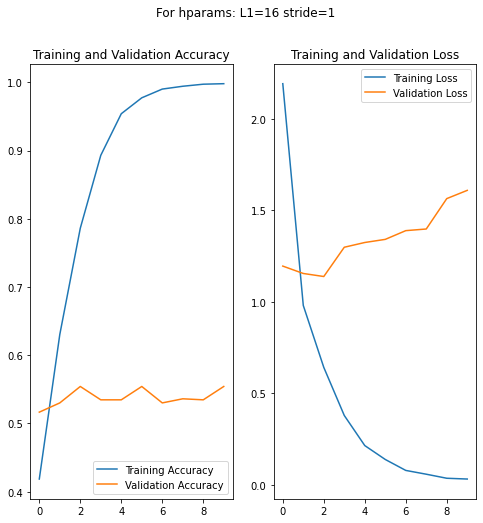

Epoch 1/10
84/84 [==============================] - 5s 59ms/step - loss: 1.2905 - accuracy: 0.4648 - val_loss: 1.1393 - val_accuracy: 0.5256
Epoch 2/10
84/84 [==============================] - 5s 60ms/step - loss: 0.9945 - accuracy: 0.6176 - val_loss: 1.0990 - val_accuracy: 0.5617
Epoch 3/10
84/84 [==============================] - 5s 60ms/step - loss: 0.8415 - accuracy: 0.6903 - val_loss: 1.0409 - val_accuracy: 0.5843
Epoch 4/10
84/84 [==============================] - 5s 60ms/step - loss: 0.6876 - accuracy: 0.7610 - val_loss: 1.0642 - val_accuracy: 0.5708
Epoch 5/10
84/84 [==============================] - 5s 60ms/step - loss: 0.5643 - accuracy: 0.8276 - val_loss: 1.0276 - val_accuracy: 0.6190
Epoch 6/10
84/84 [==============================] - 5s 61ms/step - loss: 0.4694 - accuracy: 0.8634 - val_loss: 1.0947 - val_accuracy: 0.5858
Epoch 7/10
84/84 [==============================] - 5s 61ms/step - loss: 0.3850 - accuracy: 0.8999 - val_loss: 1.0979 - val_accuracy: 0.5843
Epoch 8/10
84

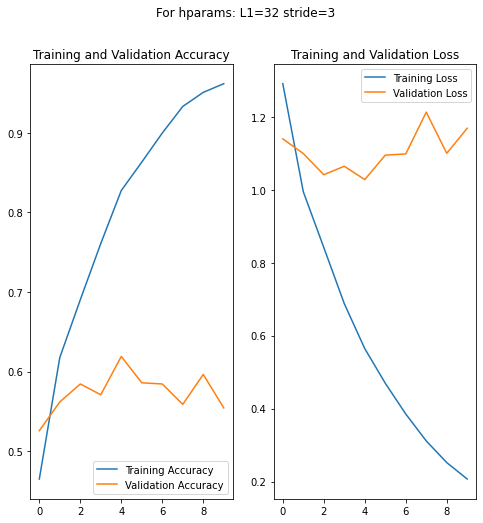

In [80]:
m = CNNModel()

hparam_configs = {"config1": {'num_units_l1': 16, 'strides': (1, 1)}, 
                  "config2": {'num_units_l1': 32, 'strides': (3, 3)},
                  "config3": {'num_units_l1': 16, 'strides': (1, 1)},
                  "config4": {'num_units_l1': 32, 'strides': (3, 3)}}

results_cnn = defaultdict(list)

for pconfig in hparam_configs:
    start_time = time.time()
    tacc, vacc = m.run_model(train_ds, val_ds, hparams=hparam_configs[pconfig])
    comp_time = time.time() - start_time
    results_cnn[pconfig] = (tacc, vacc, comp_time)

In [84]:
# Results: Training Time
res_cnn_df = pd.DataFrame(columns=["Config", "Train_Time", "Macro_Train_Acc", "Macro_Val_Acc"])

for idx, cfg_id in enumerate(results_cnn):
    res_cnn_df.loc[idx] = [str(hparam_configs[cfg_id]), results_cnn[cfg_id][2], np.mean(results_cnn[cfg_id][0]), np.mean(results_cnn[cfg_id][1])]
display(HTML(res_cnn_df.to_html()))

,Config,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,"{'num_units_l1': 16, 'strides': (1, 1)}",292.415497,0.885886,0.534337
1,"{'num_units_l1': 32, 'strides': (3, 3)}",52.451116,0.794618,0.593072
2,"{'num_units_l1': 16, 'strides': (1, 1)}",290.514027,0.863982,0.537952
3,"{'num_units_l1': 32, 'strides': (3, 3)}",51.756215,0.797102,0.574096


**Part C: LeNet Architecture**

Epoch 1/10
84/84 [==============================] - 36s 425ms/step - loss: 1.6760 - accuracy: 0.1701 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 2/10
84/84 [==============================] - 36s 425ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 3/10
84/84 [==============================] - 36s 433ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 4/10
84/84 [==============================] - 36s 431ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 5/10
84/84 [==============================] - 34s 411ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 6/10
84/84 [==============================] - 35s 412ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777
Epoch 7/10
84/84 [==============================] - 34s 411ms/step - loss: 1.6094 - accuracy: 0.1712 - val_loss: 1.6094 - val_accuracy: 0.1777

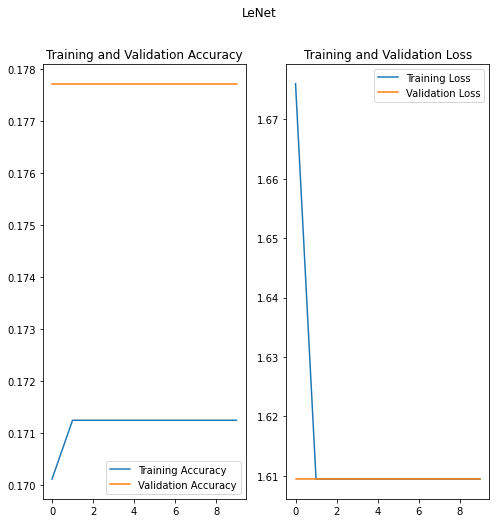

In [92]:
m = CNNModel()

start_time = time.time()
tacc, vacc = m.run_lenet_model(train_ds, val_ds)
comp_time = time.time() - start_time
results_lenet = (tacc, vacc, comp_time)

In [94]:
res_lenet_df = pd.DataFrame(columns=["Model", "Train_Time", "Macro_Train_Acc", "Macro_Val_Acc"])
res_lenet_df.loc[0] = ["LeNet Architecture", results_lenet[2], np.mean(results_lenet[0]), np.mean(results_lenet[1])]
display(HTML(res_lenet_df.to_html()))

,Model,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,LeNet Architecture,357.137244,0.171133,0.177711


In [95]:
# Feed Forward NN
print("FEED FORWARD NETWORK: ")
display(HTML(res_df.to_html()))
print("\n\n")

# Basic CNN
print("Basic CNN: ")
display(HTML(res_cnn_df.to_html()))
print("\n\n")

# LeNet
print("LeNet: ")
display(HTML(res_lenet_df.to_html()))
print("\n\n")

FEED FORWARD NETWORK: 


,Config,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,"{'num_units_l1': 16, 'strides': (1, 1)}",95.016140,0.496914,0.390512
1,"{'num_units_l1': 32, 'strides': (3, 3)}",94.264609,0.512947,0.383434
2,"{'num_units_l1': 16, 'strides': (1, 1)}",127.291623,0.470493,0.391566
3,"{'num_units_l1': 32, 'strides': (3, 3)}",127.895812,0.517049,0.398193





Basic CNN: 


,Config,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,"{'num_units_l1': 16, 'strides': (1, 1)}",292.415497,0.885886,0.534337
1,"{'num_units_l1': 32, 'strides': (3, 3)}",52.451116,0.794618,0.593072
2,"{'num_units_l1': 16, 'strides': (1, 1)}",290.514027,0.863982,0.537952
3,"{'num_units_l1': 32, 'strides': (3, 3)}",51.756215,0.797102,0.574096





LeNet: 


,Model,Train_Time,Macro_Train_Acc,Macro_Val_Acc
0,LeNet Architecture,357.137244,0.171133,0.177711


*   We can observe that in the basic feed forward network, increasing the number of neurons in the second layer has less effect on the final accuracy as compared to increasing the number of neurons in the first layer. However, we should ideally experiment with more number of neurons to substantially.
*   In the basic CNN model, we observe that strides of length 3 are more effective than strides of length 1. 
*   Unexpected, the LeNet architecture performs worse than the basic CNN and the Feed Forward Network. One reason could be that the data is not sufficient to train the large model.
*   We can observe that the time for training increases with the complexity (# parameters in the model). However, with similar number of parameters, CNN performs better than Feed Forward Network.

---
**References:**

1.   Hyperparameter Tuning Guide from tensorflow documentation: https://github.com/tensorflow/tensorboard/blob/master/tensorboard/plugins/hparams/hparams_demo.py
2. Dataset Reading and processing: https://www.tensorflow.org/tutorials/images/classification 
3. LeNet architecture: https://d2l.ai/chapter_convolutional-neural-networks/lenet.html

